In [10]:
# 2023

from tensorflow import expand_dims
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import matplotlib.pyplot as plt

In [2]:
model = VGG16()

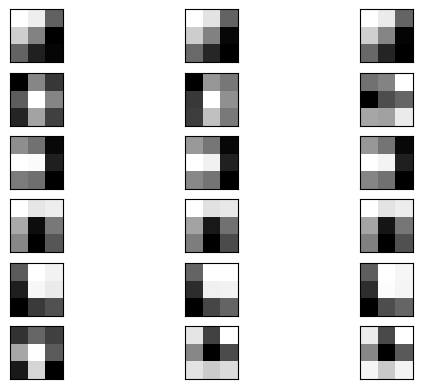

In [3]:
def normalize(array):
    f_min, f_max = array.min(), array.max()
    return (array - f_min) / (f_max - f_min)  

filters, biases = model.layers[1].get_weights()
filters = normalize(filters)
n_filters, ix = 6, 1
for i in range(n_filters):
    f = filters[:, :, :, i]
    for j in range(3):
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1
plt.show()

In [4]:
model = VGG16()
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 19ms/step
(1, 224, 224, 64)


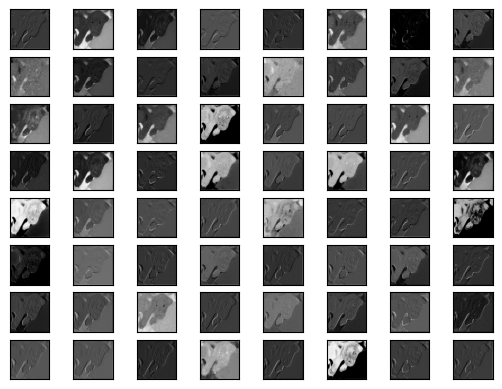

In [12]:
img_path = r'C:\Users\user\Desktop\dogs_and_cats\Dog\165.jpg'
img = load_img(img_path, target_size=(224, 224))
img = img_to_array(img)
img = expand_dims(img, axis=0) / 255

feature_maps = model.predict(img)

print(feature_maps.shape)

# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
for _ in range(square):
    for _ in range(square):
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
plt.show()

1/1 [==============================] - 0s 484ms/step


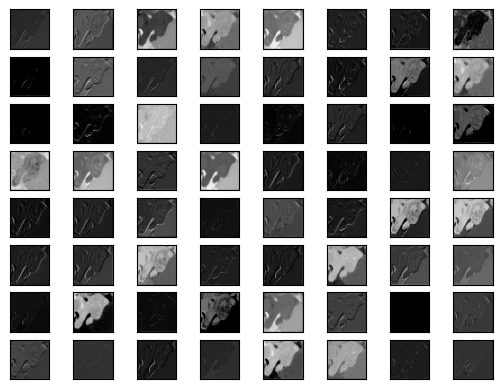

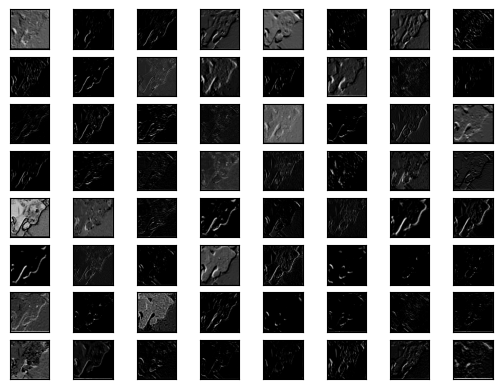

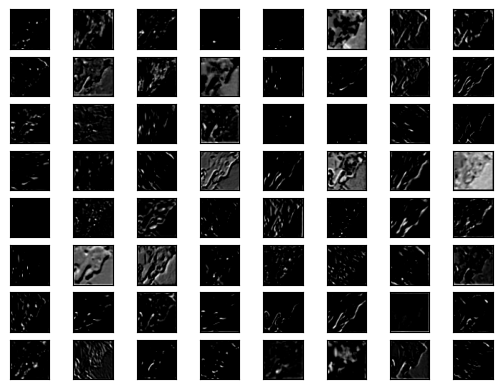

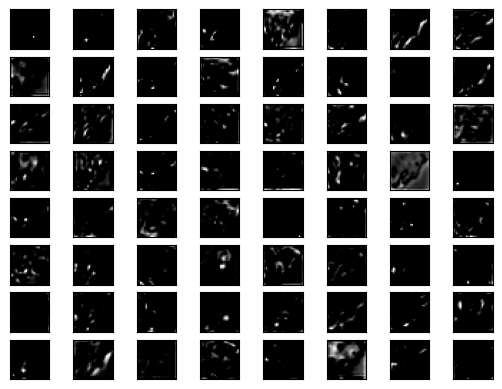

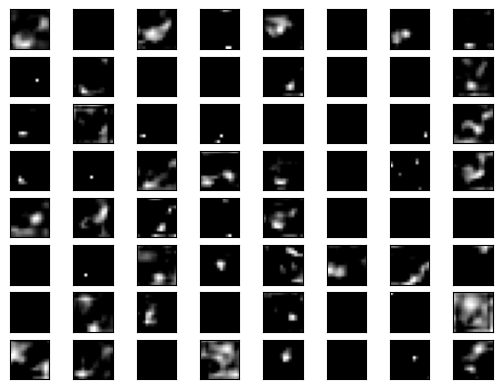

In [13]:
model = VGG16()
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
img = load_img(img_path, target_size=(224, 224))
img = img_to_array(img)
img = expand_dims(img, axis=0) / 255
feature_maps = model.predict(img)
square = 8
for fmap in feature_maps:
    ix = 1
    for _ in range(square):
        for _ in range(square):
            ax = plt.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            plt.imshow(fmap[0, :, :, ix-1], cmap='gray')
            ix += 1
    plt.show()